In [2]:
import warnings
warnings.filterwarnings("ignore", message="loaded more than 1 DLL from .libs")
import pandas as pd
import os
import numpy as np

In [14]:
path = './national_zones/pickled_df/df_agg_SE.pkl'
df = pd.read_pickle(path)

# Create the full expected range of timestamps
full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='h')

# Find missing timestamps
missing_timestamps = full_range.difference(df.index)
extra_timestamps = df.index.difference(full_range)

# Check if the DataFrame index is consistent
is_consistent = missing_timestamps.empty and extra_timestamps.empty

if is_consistent:
    print("The DataFrame index is consistent.")
else:
    print("The DataFrame index is inconsistent.")
    if not missing_timestamps.empty:
        print("Missing timestamps:")
        print(missing_timestamps)
    if not extra_timestamps.empty:
        print("Extra timestamps:")
        print(extra_timestamps)


The DataFrame index is consistent.


In [21]:
path = './national_zones/pickled_df/df_agg_ESP.pkl'
df = pd.read_pickle(path)
#df.index = df.index.strftime('%Y-%m-%d %H:%M:%S')
#df.index = pd.to_datetime(df.index)
display(df)

,surplus_all,surplus_RES,Actual load
2022-01-01 00:00:00,0.0,0.0,21517.0
2022-01-01 01:00:00,0.0,0.0,20827.0
2022-01-01 02:00:00,0.0,0.0,19530.0
2022-01-01 03:00:00,466.0,0.0,18383.0
2022-01-01 04:00:00,832.0,0.0,17680.0
...,...,...,...
2022-12-31 19:00:00,0.0,0.0,26716.0
2022-12-31 20:00:00,0.0,0.0,26652.0
2022-12-31 21:00:00,0.0,0.0,25756.0
2022-12-31 22:00:00,0.0,0.0,23096.0


In [24]:
path = './national_zones/pickled_df/df_agg_ESP.pkl'
df = pd.read_pickle(path)

def fill_nan_with_adjacent_avg(df):
    for col in df.columns:  # Iterate over all columns
        nan_indices = df[col][df[col].isnull()].index  # Locate indices of NaN values
        for idx in nan_indices:
            prev_value = df[col].shift(1).loc[idx]  # Previous value using shift
            next_value = df[col].shift(-1).loc[idx]  # Next value using shift
            
            if pd.notnull(prev_value) and pd.notnull(next_value):
                df.at[idx, col] = (prev_value + next_value) / 2  # Average of adjacent values
            elif pd.notnull(prev_value):  # If only the previous value exists
                df.at[idx, col] = prev_value
            elif pd.notnull(next_value):  # If only the next value exists
                df.at[idx, col] = next_value

# Apply the function to fill NaN values
fill_nan_with_adjacent_avg(df)

print("NaN values replaced with the average of adjacent values.")

NaN values replaced with the average of adjacent values.


In [25]:
# Check for rows with NaN values
has_nan = df.isnull().any(axis=1)

if has_nan.any():
    print("The DataFrame contains NaN values.")
    
    # Locate the rows with NaN values
    nan_locations = df[has_nan]
    print("Rows with NaN values:")
    print(nan_locations)
    
    # If you want to find column-wise NaN details
    nan_summary = df.isnull().sum()
    print("\nColumn-wise NaN count:")
    print(nan_summary[nan_summary > 0])
else:
    print("The DataFrame does not contain any NaN values.")


The DataFrame does not contain any NaN values.


In [165]:
t = pd.date_range(start="2022-01-01 00:00:00", end="2022-12-31 23:00:00", freq="h")
df = df.loc[df.index.isin(t)]
display(df)

,Time,Fossil,Renewables,Storage,Hydro Pumped Storage charge,Actual load,surplus_all,surplus_RES
2022-01-01 00:00:00,2022-01-01 00:00:00+01:00,4531.0,14472.0,1333.0,NaN,21517.0,-2514.0,-7045.0
2022-01-01 01:00:00,2022-01-01 01:00:00+01:00,4892.0,14545.0,1347.0,NaN,20827.0,-1390.0,-6282.0
2022-01-01 02:00:00,2022-01-01 02:00:00+01:00,4561.0,14554.0,746.0,NaN,19530.0,-415.0,-4976.0
2022-01-01 03:00:00,2022-01-01 03:00:00+01:00,4600.0,14249.0,733.0,NaN,18383.0,466.0,-4134.0
2022-01-01 04:00:00,2022-01-01 04:00:00+01:00,4468.0,14044.0,755.0,NaN,17680.0,832.0,-3636.0
...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00+01:00,2544.0,17212.0,7496.0,3000.0,26716.0,-6960.0,-9504.0
2022-12-31 20:00:00,2022-12-31 20:00:00+01:00,2216.0,18100.0,5624.0,2172.0,26652.0,-6336.0,-8552.0
2022-12-31 21:00:00,2022-12-31 21:00:00+01:00,2512.0,17720.0,5668.0,2292.0,25756.0,-5524.0,-8036.0
2022-12-31 22:00:00,2022-12-31 22:00:00+01:00,2632.0,17052.0,3524.0,732.0,23096.0,-3412.0,-6044.0


In [166]:
df = df[['Actual load', 'surplus_all', 'surplus_RES']]

In [167]:
df = replace_nan_with_adjacent_avg_time(df)

In [168]:
nan_indices = df[df.isna().any(axis=1)].index
print("Indices with NaN values:", nan_indices.tolist())

Indices with NaN values: []


In [169]:
df = df[['surplus_all', 'surplus_RES', 'Actual load']].clip(lower=0)
display(df)

,surplus_all,surplus_RES,Actual load
2022-01-01 00:00:00,0.0,0.0,21517.0
2022-01-01 01:00:00,0.0,0.0,20827.0
2022-01-01 02:00:00,0.0,0.0,19530.0
2022-01-01 03:00:00,466.0,0.0,18383.0
2022-01-01 04:00:00,832.0,0.0,17680.0
...,...,...,...
2022-12-31 19:00:00,0.0,0.0,26716.0
2022-12-31 20:00:00,0.0,0.0,26652.0
2022-12-31 21:00:00,0.0,0.0,25756.0
2022-12-31 22:00:00,0.0,0.0,23096.0


In [170]:
df.to_pickle('./national_zones/pickled_df/df_agg_ESP.pkl')

In [176]:
df.loc['2022-04-28 16:00:00']

surplus_all        0.0
surplus_RES        0.0
Actual load    28163.0
Name: 2022-04-28 16:00:00, dtype: float64

Surplus Section

In [2]:
path = './national_zones/pickled_df/'
df_path_list = os.listdir(path)
print(df_path_list)

['COP_2021_df.pkl', 'COP_2022_df.pkl', 'COP_2023_df.pkl', 'df_agg_AUT.pkl', 'df_agg_ESP.pkl', 'df_agg_IT.pkl', 'df_agg_SE.pkl', 'df_AUT.pkl', 'df_demand.pkl', 'df_ESP.pkl', 'df_IT_CNOR.pkl', 'df_IT_CSUD.pkl', 'df_IT_NORD.pkl', 'df_IT_SARD.pkl', 'df_IT_SICI.pkl', 'df_IT_SUD.pkl', 'df_SE1.pkl', 'df_SE2.pkl', 'df_SE3.pkl', 'df_SE4.pkl', 'EER_2021_df.pkl', 'EER_2022_df.pkl', 'EER_2023_df.pkl']


In [ ]:
df_esp = pd.read_pickle()

In [4]:
# Define the hourly time series for the entire year
time_series = pd.date_range(start='2022-01-01 00:00:00', periods=8760, freq='1h')

# Load DataFrame from pickle file
df = pd.read_pickle(os.path.join(path, 'df_agg_ESP.pkl'))

# Remove timezone from the index
df.index = df.index.tz_localize(None)

# Sort the index
df = df.sort_index()

# Remove duplicate timestamps from the index
df = df[~df.index.duplicated(keep='first')]

# Reindex to ensure all timestamps are covered, filling missing rows if necessary
df = df.reindex(time_series)

# Save the updated DataFrame back to the pickle file
df.to_pickle(os.path.join(path, 'df_agg_ESP.pkl'))

In [5]:
# Define the hourly time series for the entire year
time_series = pd.date_range(start='2022-01-01 00:00:00', periods=8760, freq='1h')

# Load DataFrame from pickle file
df = pd.read_pickle(os.path.join(path, 'df_agg_AUT.pkl'))

# Remove timezone from the index
df.index = df.index.tz_localize(None)

# Sort the index
df = df.sort_index()

# Remove duplicate timestamps from the index
df = df[~df.index.duplicated(keep='first')]

# Reindex to ensure all timestamps are covered, filling missing rows if necessary
df = df.reindex(time_series)

# Save the updated DataFrame back to the pickle file
df.to_pickle(os.path.join(path, 'df_agg_AUT.pkl'))

In [3]:
# Dictionary to hold the loaded dataframes by country
country_dfs = {
    'AUT': [],
    'ESP': [],
    'IT': [],
    'SE': []
}

# Load data and categorize by country
for file_path in df_path_list:
    df = pd.read_pickle(os.path.join(path, file_path))
    if 'Time' in df.columns:
        df = df.drop(columns=['Time'])
    if 'df_AUT' in file_path:
        country_dfs['AUT'].append(df)
    elif 'df_ESP' in file_path:
        country_dfs['ESP'].append(df)
    elif 'df_IT' in file_path:
        country_dfs['IT'].append(df)
    elif 'df_SE' in file_path:
        country_dfs['SE'].append(df)

country_dfs['AUT'][0].columns   

Index(['Fossil', 'Renewables', 'Storage', 'Hydro Pumped Storage charge',
       'Actual load', 'surplus_all', 'surplus_RES'],
      dtype='object')

In [4]:
for country in country_dfs.keys():
    df_agg = pd.DataFrame(columns=['surplus_all', 'surplus_RES', 'Actual load'])
    for n in range(len(country_dfs[country])):
        df = country_dfs[country][n][['surplus_all', 'surplus_RES']].clip(lower=0)
        df['Actual load'] = country_dfs[country][n]['Actual load']
        if df_agg.empty:
            df_agg = df.copy() 
        else:
            df_agg += df
        df_agg.to_pickle(f'./df_agg_{country}.pkl')

<Axes: >

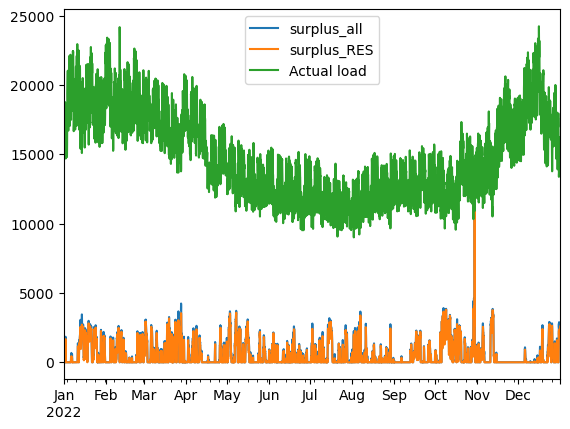

In [5]:
df_agg.plot()

Demand Section

In [2]:
demand_path = './thermal_demand_per_country_electricity.csv'
df_demand = pd.read_csv(demand_path, delimiter=';')

# Remove periods from numeric columns, if necessary, and convert to floats
for column in df_demand.columns[1:]:  # Skip the 'datetime' column
    # Only apply replacement if the column type is not numeric
    if df_demand[column].dtype == 'object':
        df_demand[column] = df_demand[column].str.replace('.', '', regex=False).astype(float)

# Optional: Convert the 'datetime' column to datetime format
df_demand['datetime'] = pd.to_datetime(df_demand['datetime'], format='%d/%m/%Y %H:%M')

df_demand.head()

,datetime,Spain_DHW_kWh,Italy_DHW_kWh,Austria_DHW_kWh,Germany_DHW_kWh,Sweden_DHW_kWh,Spain_heating_kWh,Spain_cooling_kWh,Italy_heating_kWh,Italy_cooling_kWh,Austria_heating_kWh,Austria_cooling_kWh,Germany_heating_kWh,Germany_cooling_kWh,Sweden_heating_kWh,Sweden_cooling_kWh
0,2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,1684776.573,0.0,1312820.419,0.0,641528.7443,0.0,1820246.496,0.0,2648043.582,0
1,2022-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,1709813.692,0.0,1332329.973,0.0,651062.3711,0.0,1847296.805,0.0,2687395.613,0
2,2022-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,1710848.236,0.0,1333136.117,0.0,651456.3047,0.0,1848414.536,0.0,2689021.657,0
3,2022-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,1723360.325,0.0,1342885.852,0.0,656220.6544,0.0,1861932.700,0.0,2708687.503,0
4,2022-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,1736234.055,0.0,1352917.387,0.0,661122.7096,0.0,1875841.584,0.0,2728921.757,0


In [3]:
df_demand.to_pickle('./df_demand.pkl')

COP & EER Section

In [30]:
COP_df = pd.read_excel('./COP&EER/Elaborazione COP 201.xlsx', usecols='F, O, X, AG, AQ, AZ')

FileNotFoundError: [Errno 2] No such file or directory: './COP&EER/Elaborazione COP 201.xlsx'

In [31]:
COP_df = COP_df.iloc[1:, :]
display(COP_df)

,IT,GER,AUT,ESP,SE
DATETIME,,,,,
2022-01-01 01:00:00,3.676799,5.118631,4.759356,3.594533,3.590382
2022-01-01 02:00:00,3.638052,5.058409,4.764533,3.579584,3.599772
2022-01-01 03:00:00,3.607812,4.999048,4.676335,3.589656,3.616069
2022-01-01 04:00:00,3.597533,4.990848,4.537337,3.582070,3.611671
2022-01-01 05:00:00,3.595250,4.964928,4.538063,3.564873,3.578011
...,...,...,...,...,...
2022-12-31 19:00:00,3.829115,5.378479,4.620688,3.866714,3.891796
2022-12-31 20:00:00,3.824893,5.350270,4.596995,3.861192,3.867859
2022-12-31 21:00:00,3.817410,5.322602,4.532437,3.831817,3.847627


In [32]:
COP_df['DATETIME'] = pd.to_datetime(COP_df['DATETIME'])
COP_df.set_index('DATETIME', inplace=True)
display(COP_df)

KeyError: 'DATETIME'

In [ ]:
COP_df.rename(columns={'TOTAL': 'IT', 'TOTAL.1': 'GER', 'TOTAL.2': 'AUT', 'TOTAL.3': 'ESP', 'TOTAL.4': 'SE'}, inplace=True)
display(COP_df)


,IT,GER,AUT,ESP,SE
DATETIME,,,,,
2022-01-01 00:00:00,3.666613,5.105841,4.762583,3.618087,3.593628
2022-01-01 01:00:00,3.676799,5.118631,4.759356,3.594533,3.590382
2022-01-01 02:00:00,3.638052,5.058409,4.764533,3.579584,3.599772
2022-01-01 03:00:00,3.607812,4.999048,4.676335,3.589656,3.616069
2022-01-01 04:00:00,3.597533,4.990848,4.537337,3.582070,3.611671
...,...,...,...,...,...
2022-12-31 19:00:00,3.829115,5.378479,4.620688,3.866714,3.891796
2022-12-31 20:00:00,3.824893,5.350270,4.596995,3.861192,3.867859
2022-12-31 21:00:00,3.817410,5.322602,4.532437,3.831817,3.847627


In [33]:
COP_df.to_pickle('./COP_2021_df.pkl')

In [2]:
import pandas as pd
df = pd.read_pickle('national_zones/pickled_df/df_demand.pkl')

c:\Users\yangzhec\.conda\envs\pytrn\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yangzhec\.conda\envs\pytrn\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\yangzhec\.conda\envs\pytrn\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
display(df)

,datetime,Spain_DHW_kWh,Italy_DHW_kWh,Austria_DHW_kWh,Germany_DHW_kWh,Sweden_DHW_kWh,Spain_heating_kWh,Spain_cooling_kWh,Italy_heating_kWh,Italy_cooling_kWh,Austria_heating_kWh,Austria_cooling_kWh,Germany_heating_kWh,Germany_cooling_kWh,Sweden_heating_kWh,Sweden_cooling_kWh
0,2022-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1684776.573,0.0,1.312820e+06,0.0,641528.7443,0.0,1820246.496,0.0,2648043.582,0
1,2022-01-01 01:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1709813.692,0.0,1.332330e+06,0.0,651062.3711,0.0,1847296.805,0.0,2687395.613,0
2,2022-01-01 02:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1710848.236,0.0,1.333136e+06,0.0,651456.3047,0.0,1848414.536,0.0,2689021.657,0
3,2022-01-01 03:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1723360.325,0.0,1.342886e+06,0.0,656220.6544,0.0,1861932.700,0.0,2708687.503,0
4,2022-01-01 04:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1736234.055,0.0,1.352917e+06,0.0,661122.7096,0.0,1875841.584,0.0,2728921.757,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 19:00:00,2.700192e+05,2.459914e+05,1.751295e+05,7.525459e+05,1.989336e+05,1111464.931,0.0,9.448166e+05,0.0,604652.4179,0.0,1849849.898,0.0,2827923.639,0
8756,2022-12-31 20:00:00,1.890135e+06,1.721940e+06,1.225906e+06,5.267821e+06,1.392535e+06,1126850.546,0.0,9.578953e+05,0.0,613022.4072,0.0,1875456.715,0.0,2867069.584,0
8757,2022-12-31 21:00:00,3.870276e+06,3.525877e+06,2.510189e+06,1.078649e+07,2.851382e+06,1125658.735,0.0,9.568822e+05,0.0,612374.0454,0.0,1873473.143,0.0,2864037.235,0
8758,2022-12-31 22:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1127972.847,0.0,9.588493e+05,0.0,613632.9542,0.0,1877324.599,0.0,2869925.077,0
